In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from scipy.stats import norm
from ape import accounts, chain, Contract, networks, project

In [3]:
# SEE: https://gist.github.com/banteg/dcf6082ff7fc6ad51ce220146f29d9ff
networks.parse_network_choice('ethereum:mainnet:alchemy').__enter__()

<alchemy chain_id=1>

In [4]:
# USDC/WETH 5bps pool, 8h candles over Dec 2022 to May 2023
# @dev {tick_width: fp}
FILEPATHS = {
    1400: "results/backtest/UniswapV3LPSimpleRunner_0x88e6A0c2dDD26FEEb64F039a2c41296FcB3f5640_1400_7200_16219692_17267692_2400.csv",
   2800: "results/backtest/UniswapV3LPSimpleRunner_0x88e6A0c2dDD26FEEb64F039a2c41296FcB3f5640_2800_7200_16219692_17267692_2400.csv",
   5600: "results/backtest/UniswapV3LPSimpleRunner_0x88e6A0c2dDD26FEEb64F039a2c41296FcB3f5640_5600_7200_16219692_17267692_2400.csv",
   8400: "results/backtest/UniswapV3LPSimpleRunner_0x88e6A0c2dDD26FEEb64F039a2c41296FcB3f5640_8400_7200_16219692_17267692_2400.csv",
   11200: "results/backtest/UniswapV3LPSimpleRunner_0x88e6A0c2dDD26FEEb64F039a2c41296FcB3f5640_11200_7200_16219692_17267692_2400.csv",
   14000: "results/backtest/UniswapV3LPSimpleRunner_0x88e6A0c2dDD26FEEb64F039a2c41296FcB3f5640_14000_7200_16219692_17267692_2400.csv",
    0: "results/backtest/UniswapV3LPSimpleRunner_0x88e6A0c2dDD26FEEb64F039a2c41296FcB3f5640_0_7200_16219692_17267692_2400.csv",  # full range LP
    -1: "results/backtest/UniswapV3LPOptimizedRunner_0x88e6A0c2dDD26FEEb64F039a2c41296FcB3f5640_0_7200_16219692_17267692_2400.csv",  # opportunistic LP
}

In [5]:
df = pd.read_csv(FILEPATHS[0])
df

,number,values0,values1,values2,values3,sqrtPriceX96,tick,liquidity,feeGrowthGlobal0X128,feeGrowthGlobal1X128,position_token_id,position_liquidity,position_tick_lower,position_tick_upper,position_amount0,position_amount1,position_fees0_cumulative,position_fees1_cumulative
0,16219693,1184180473737,1000096373981086032955,0,48211096091070,2302457180693885351454651093163492,205553,31203981017892687890,2181620581902003936411883992456929,1026699780925062056301321001565722942741084,-1,34413581591046522,-887270,887270,1184294597923,1000000000000000000000,0,0
1,16222093,1175860832468,1007172418046749714633,36870369,35121222243234717,2318747899162385489001287554456344,205694,17540821031132433136,2181985157052788187585985499073660,1027046583748145707407639599439896464086763,-1,34413581591046522,-887270,887270,1184294597923,1000000000000000000000,0,0
2,16224493,1195620849490,990526886870751338638,79507064,62541008198979213,2280425969616657314568929983238151,205361,30523448134936311091,2182406749771601875934982373447527,1027317711286579945199071017760952647928490,-1,34413581591046522,-887270,887270,1184294597923,1000000000000000000000,0,0
3,16226893,1203225714564,984266362984504881565,110750550,85149890953964578,2266012770497242894086255374140612,205234,20905059435363221456,2182715686150892854181613442855243,1027541268492241619844457934521929909830784,-1,34413581591046522,-887270,887270,1184294597923,1000000000000000000000,0,0
4,16229293,1200989209550,986275362611888780077,23041406,19906669647239693,2270435262486917424056195007509857,205273,22227312718227892744,2182943499819872818882169549269372,1027738088574684734465475778290005927962009,-1,34416653935879386,-887270,887270,1203333135233,984354235432958918525,110750550,85149890953964578
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
432,17256493,1483531666195,820791900865718094151,49305725,26475793703772034,1863578556449392031538434625661268,201323,27420357340978417904,2374915665675843076475381608708728,1143303341153993455122962271726629264301423,-1,34895139723049839,-887270,887270,1480234759987,822620040623526736953,19637031525,11845236998428987242
433,17258893,1488138579228,818304518861634471574,14056381,6520485285497433,1857870207979672951132848076883101,201262,28684533318695592725,2375052732962575387887576720301920,1143366924034890098429964558540172533901472,-1,34896282381872287,-887270,887270,1483580245964,820818778107487647719,19686337250,11871712792132759276
434,17261293,1479470248169,823099028576077162663,27350472,16283872429414352,1868755613785232690185652557661677,201379,20097267437575475732,2375182366967365283755698550567022,1143462129261915180149816108783753626834180,-1,34896282381872287,-887270,887270,1483580245964,820818778107487647719,19686337250,11871712792132759276
435,17263693,1493455353249,815391314796296811690,56383853,28434060989323540,1851256099273191187753267917130117,201190,29915981331513473191,2375465478720511304356360392619927,1143580608785792754282024902648959495253213,-1,34896282381872287,-887270,887270,1483580245964,820818778107487647719,19686337250,11871712792132759276


In [6]:
def price(sqrt_price_x96: int) -> int:
    return (int(sqrt_price_x96) ** 2) // (1 << 192)

In [7]:
df['price'] = df['sqrtPriceX96'].apply(price)
df['price']

0      844547259
1      856540493
2      828462373
3      818023045
4      821219170
         ...    
432    553268878
433    549884621
434    556347131
435    545976358
436    547272835
Name: price, Length: 437, dtype: int64

<Axes: xlabel='number'>

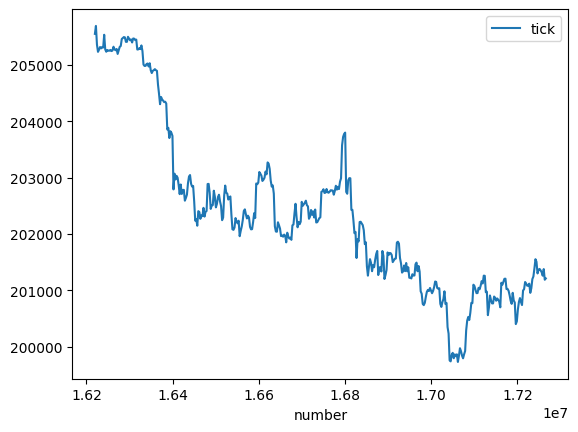

In [8]:
df.plot(x='number', y='tick')

In [9]:
# theta = fee volume per second per unit of external virtual liquidity
df['theta0'] = (df['price'] * df['feeGrowthGlobal0X128'].astype('float').diff() / df['number'].astype('float').diff()) / ((1 << 32) * df['sqrtPriceX96'].astype('float'))
df['theta1'] = (df['feeGrowthGlobal1X128'].astype('float').diff() / df['number'].astype('float').diff()) / ((1 << 32) * df['sqrtPriceX96'].astype('float'))
df['theta'] = (df['theta0'] + df['theta1']) / 2  # avg

In [10]:
df

,number,values0,values1,values2,values3,sqrtPriceX96,tick,liquidity,feeGrowthGlobal0X128,feeGrowthGlobal1X128,...,position_tick_lower,position_tick_upper,position_amount0,position_amount1,position_fees0_cumulative,position_fees1_cumulative,price,theta0,theta1,theta
0,16219693,1184180473737,1000096373981086032955,0,48211096091070,2302457180693885351454651093163492,205553,31203981017892687890,2181620581902003936411883992456929,1026699780925062056301321001565722942741084,...,-887270,887270,1184294597923,1000000000000000000000,0,0,844547259,NaN,NaN,NaN
1,16222093,1175860832468,1007172418046749714633,36870369,35121222243234717,2318747899162385489001287554456344,205694,17540821031132433136,2181985157052788187585985499073660,1027046583748145707407639599439896464086763,...,-887270,887270,1184294597923,1000000000000000000000,0,0,856540493,1.306503e-08,1.450969e-08,1.378736e-08
2,16224493,1195620849490,990526886870751338638,79507064,62541008198979213,2280425969616657314568929983238151,205361,30523448134936311091,2182406749771601875934982373447527,1027317711286579945199071017760952647928490,...,-887270,887270,1184294597923,1000000000000000000000,0,0,828462373,1.485863e-08,1.153418e-08,1.319640e-08
3,16226893,1203225714564,984266362984504881565,110750550,85149890953964578,2266012770497242894086255374140612,205234,20905059435363221456,2182715686150892854181613442855243,1027541268492241619844457934521929909830784,...,-887270,887270,1184294597923,1000000000000000000000,0,0,818023045,1.081935e-08,9.570954e-09,1.019515e-08
4,16229293,1200989209550,986275362611888780077,23041406,19906669647239693,2270435262486917424056195007509857,205273,22227312718227892744,2182943499819872818882169549269372,1027738088574684734465475778290005927962009,...,-887270,887270,1203333135233,984354235432958918525,110750550,85149890953964578,821219170,7.993899e-09,8.409868e-09,8.201883e-09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
432,17256493,1483531666195,820791900865718094151,49305725,26475793703772034,1863578556449392031538434625661268,201323,27420357340978417904,2374915665675843076475381608708728,1143303341153993455122962271726629264301423,...,-887270,887270,1480234759987,822620040623526736953,19637031525,11845236998428987242,553268878,3.270639e-09,2.942281e-09,3.106460e-09
433,17258893,1488138579228,818304518861634471574,14056381,6520485285497433,1857870207979672951132848076883101,201262,28684533318695592725,2375052732962575387887576720301920,1143366924034890098429964558540172533901472,...,-887270,887270,1483580245964,820818778107487647719,19686337250,11871712792132759276,549884621,3.935672e-09,3.320120e-09,3.627896e-09
434,17261293,1479470248169,823099028576077162663,27350472,16283872429414352,1868755613785232690185652557661677,201379,20097267437575475732,2375182366967365283755698550567022,1143462129261915180149816108783753626834180,...,-887270,887270,1483580245964,820818778107487647719,19686337250,11871712792132759276,556347131,3.744046e-09,4.942392e-09,4.343219e-09
435,17263693,1493455353249,815391314796296811690,56383853,28434060989323540,1851256099273191187753267917130117,201190,29915981331513473191,2375465478720511304356360392619927,1143580608785792754282024902648959495253213,...,-887270,887270,1483580245964,820818778107487647719,19686337250,11871712792132759276,545976358,8.100170e-09,6.208772e-09,7.154471e-09


In [11]:
FILEPATH_FIT = "fits/price_0x88e6A0c2dDD26FEEb64F039a2c41296FcB3f5640_13143698_18399698_7200_params.csv"
df_fit = pd.read_csv(FILEPATH_FIT)
df_fit

,mu,sigma
0,2.654974e-07,0.000455


In [12]:
sigma = df_fit['sigma'].iloc[0]
sigma  # per block

0.0004546440886143

In [13]:
# roughly min fee volume per unit of external liquidity needed for opportunistic LP to be +EV
theta_min = sigma ** 2 / 8
theta_min

2.5837655913990937e-08

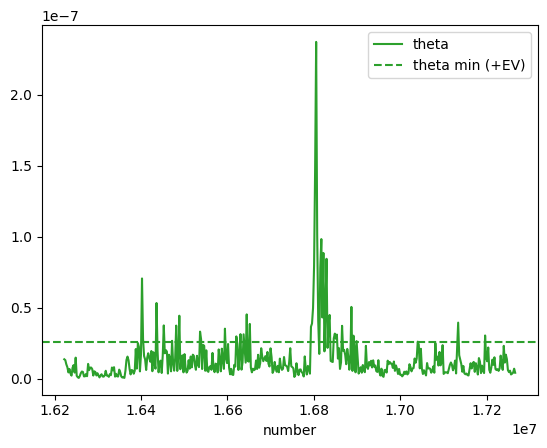

In [14]:
ax = df.plot(x='number', y='theta', color='C2')
ax.axhline(theta_min, color='C2', linestyle='--', label='theta min (+EV)')
ax.legend(loc='upper right')

In [15]:
# since compounding fees into principal each rebalance, only look at principal timeseries in units of token1
df['v-inf'] = (df['values0'].astype('float')) * df['price'] + df['values1'].astype('float')
df['y-inf'] = df['v-inf'] / df['v-inf'].iloc[0] - 1  # yield vs initial principal
df['i-inf'] = df['v-inf'] / (df['position_amount0'].astype('float').iloc[0] * df['price'] + df['position_amount1'].astype('float').iloc[0]) - 1  # yield vs initial passive hold
df['k-inf'] = df['v-inf'] / df['v-inf'] - 1  # yield vs full tick range lp

In [16]:
# accumulated fees and rate of return on them vs original principal value
df['f-inf'] = (df['position_fees0_cumulative'].astype('float')) * df['price'] + df['position_fees1_cumulative'].astype('float')
df['r-inf'] = df['f-inf'] / df['v-inf'].iloc[0]

In [17]:
# store the tick width for the strat
df['tick_width-inf'] = df['position_tick_upper'] - df['position_tick_lower']

In [18]:
df

,number,values0,values1,values2,values3,sqrtPriceX96,tick,liquidity,feeGrowthGlobal0X128,feeGrowthGlobal1X128,...,theta0,theta1,theta,v-inf,y-inf,i-inf,k-inf,f-inf,r-inf,tick_width-inf
0,16219693,1184180473737,1000096373981086032955,0,48211096091070,2302457180693885351454651093163492,205553,31203981017892687890,2181620581902003936411883992456929,1026699780925062056301321001565722942741084,...,NaN,NaN,NaN,2.000193e+21,0.000000,-4.643245e-09,0.0,0.000000e+00,0.000000,1774540
1,16222093,1175860832468,1007172418046749714633,36870369,35121222243234717,2318747899162385489001287554456344,205694,17540821031132433136,2181985157052788187585985499073660,1027046583748145707407639599439896464086763,...,1.306503e-08,1.450969e-08,1.378736e-08,2.014345e+21,0.007075,-2.553796e-05,0.0,0.000000e+00,0.000000,1774540
2,16224493,1195620849490,990526886870751338638,79507064,62541008198979213,2280425969616657314568929983238151,205361,30523448134936311091,2182406749771601875934982373447527,1027317711286579945199071017760952647928490,...,1.485863e-08,1.153418e-08,1.319640e-08,1.981054e+21,-0.009569,-4.529701e-05,0.0,0.000000e+00,0.000000,1774540
3,16226893,1203225714564,984266362984504881565,110750550,85149890953964578,2266012770497242894086255374140612,205234,20905059435363221456,2182715686150892854181613442855243,1027541268492241619844457934521929909830784,...,1.081935e-08,9.570954e-09,1.019515e-08,1.968533e+21,-0.015828,-1.257364e-04,0.0,0.000000e+00,0.000000,1774540
4,16229293,1200989209550,986275362611888780077,23041406,19906669647239693,2270435262486917424056195007509857,205273,22227312718227892744,2182943499819872818882169549269372,1027738088574684734465475778290005927962009,...,7.993899e-09,8.409868e-09,8.201883e-09,1.972551e+21,-0.013820,-7.453382e-06,0.0,1.761004e+17,0.000088,1774540
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
432,17256493,1483531666195,820791900865718094151,49305725,26475793703772034,1863578556449392031538434625661268,201323,27420357340978417904,2374915665675843076475381608708728,1143303341153993455122962271726629264301423,...,3.270639e-09,2.942281e-09,3.106460e-09,1.641584e+21,-0.179287,-8.246295e-03,0.0,2.270980e+19,0.011354,1774540
433,17258893,1488138579228,818304518861634471574,14056381,6520485285497433,1857870207979672951132848076883101,201262,28684533318695592725,2375052732962575387887576720301920,1143366924034890098429964558540172533901472,...,3.935672e-09,3.320120e-09,3.627896e-09,1.636609e+21,-0.181774,-8.851819e-03,0.0,2.269693e+19,0.011347,1774540
434,17261293,1479470248169,823099028576077162663,27350472,16283872429414352,1868755613785232690185652557661677,201379,20097267437575475732,2375182366967365283755698550567022,1143462129261915180149816108783753626834180,...,3.744046e-09,4.942392e-09,4.343219e-09,1.646198e+21,-0.176980,-7.644226e-03,0.0,2.282415e+19,0.011411,1774540
435,17263693,1493455353249,815391314796296811690,56383853,28434060989323540,1851256099273191187753267917130117,201190,29915981331513473191,2375465478720511304356360392619927,1143580608785792754282024902648959495253213,...,8.100170e-09,6.208772e-09,7.154471e-09,1.630783e+21,-0.184687,-9.604186e-03,0.0,2.261999e+19,0.011309,1774540


<Axes: xlabel='number'>

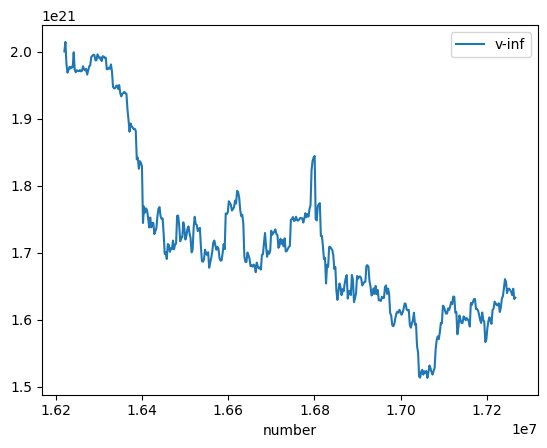

In [19]:
# value in units of token1 over time
df.plot(x='number', y='v-inf')

<Axes: xlabel='number'>

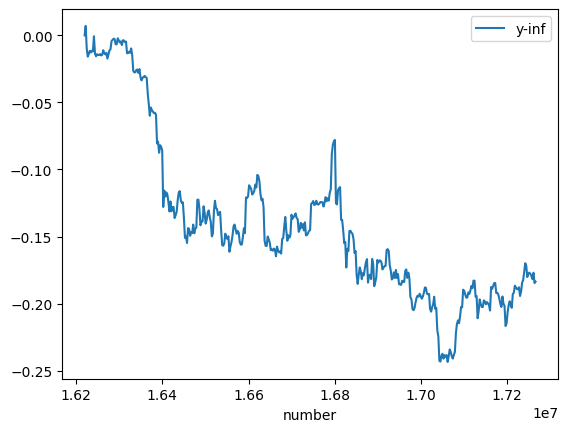

In [20]:
# yield in units of token1 over time relative to initial principal
df.plot(x='number', y='y-inf')

<Axes: xlabel='number'>

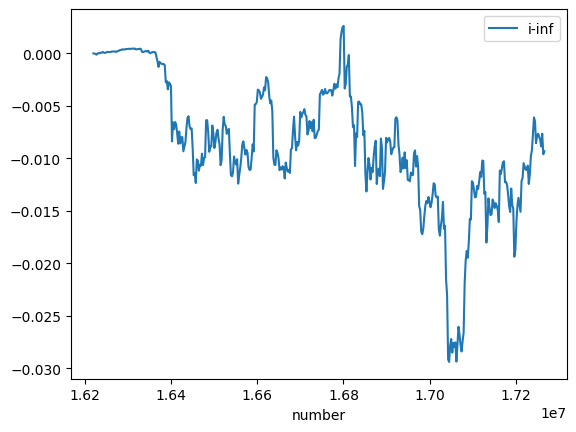

In [21]:
# yield in units of token1 over time relative to passive hold
df.plot(x='number', y='i-inf')

<Axes: xlabel='number'>

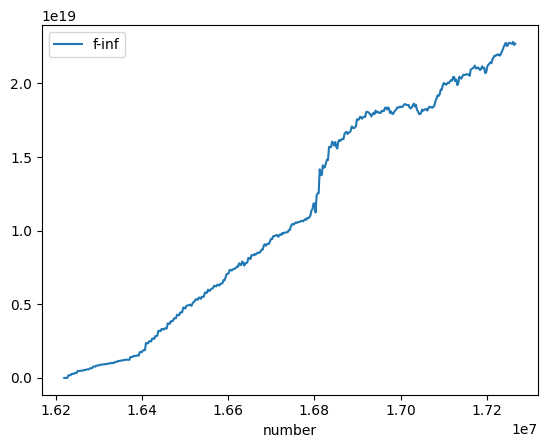

In [22]:
# accumulated fees in units of token1 over time
df.plot(x='number', y='f-inf')

<Axes: xlabel='number'>

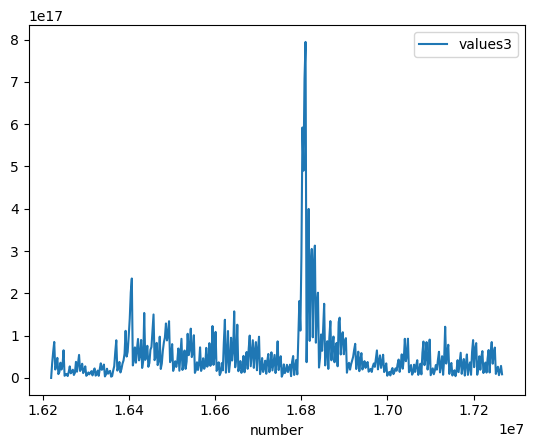

In [23]:
# fees in units of token1 over time
df.plot(x='number', y='values3')

<Axes: xlabel='number'>

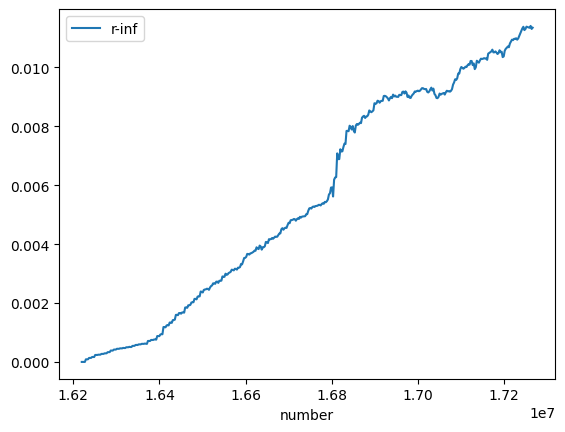

In [24]:
# fee return in units of token1 over time
df.plot(x='number', y='r-inf')

In [25]:
df.columns

Index(['number', 'values0', 'values1', 'values2', 'values3', 'sqrtPriceX96',
       'tick', 'liquidity', 'feeGrowthGlobal0X128', 'feeGrowthGlobal1X128',
       'position_token_id', 'position_liquidity', 'position_tick_lower',
       'position_tick_upper', 'position_amount0', 'position_amount1',
       'position_fees0_cumulative', 'position_fees1_cumulative', 'price',
       'theta0', 'theta1', 'theta', 'v-inf', 'y-inf', 'i-inf', 'k-inf',
       'f-inf', 'r-inf', 'tick_width-inf'],
      dtype='object')

In [26]:
# drop columns that are tick width dependent to build df across each backtest file
df.drop(columns=[f'values{i}' for i in range(4)], inplace=True)

In [27]:
df.drop(columns=[
    'position_token_id',
    'position_liquidity',
    'position_tick_lower',
    'position_tick_upper',
    'position_amount0',
    'position_amount1',
    'position_fees0_cumulative',
    'position_fees1_cumulative'
], inplace=True)

In [28]:
df

,number,sqrtPriceX96,tick,liquidity,feeGrowthGlobal0X128,feeGrowthGlobal1X128,price,theta0,theta1,theta,v-inf,y-inf,i-inf,k-inf,f-inf,r-inf,tick_width-inf
0,16219693,2302457180693885351454651093163492,205553,31203981017892687890,2181620581902003936411883992456929,1026699780925062056301321001565722942741084,844547259,NaN,NaN,NaN,2.000193e+21,0.000000,-4.643245e-09,0.0,0.000000e+00,0.000000,1774540
1,16222093,2318747899162385489001287554456344,205694,17540821031132433136,2181985157052788187585985499073660,1027046583748145707407639599439896464086763,856540493,1.306503e-08,1.450969e-08,1.378736e-08,2.014345e+21,0.007075,-2.553796e-05,0.0,0.000000e+00,0.000000,1774540
2,16224493,2280425969616657314568929983238151,205361,30523448134936311091,2182406749771601875934982373447527,1027317711286579945199071017760952647928490,828462373,1.485863e-08,1.153418e-08,1.319640e-08,1.981054e+21,-0.009569,-4.529701e-05,0.0,0.000000e+00,0.000000,1774540
3,16226893,2266012770497242894086255374140612,205234,20905059435363221456,2182715686150892854181613442855243,1027541268492241619844457934521929909830784,818023045,1.081935e-08,9.570954e-09,1.019515e-08,1.968533e+21,-0.015828,-1.257364e-04,0.0,0.000000e+00,0.000000,1774540
4,16229293,2270435262486917424056195007509857,205273,22227312718227892744,2182943499819872818882169549269372,1027738088574684734465475778290005927962009,821219170,7.993899e-09,8.409868e-09,8.201883e-09,1.972551e+21,-0.013820,-7.453382e-06,0.0,1.761004e+17,0.000088,1774540
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
432,17256493,1863578556449392031538434625661268,201323,27420357340978417904,2374915665675843076475381608708728,1143303341153993455122962271726629264301423,553268878,3.270639e-09,2.942281e-09,3.106460e-09,1.641584e+21,-0.179287,-8.246295e-03,0.0,2.270980e+19,0.011354,1774540
433,17258893,1857870207979672951132848076883101,201262,28684533318695592725,2375052732962575387887576720301920,1143366924034890098429964558540172533901472,549884621,3.935672e-09,3.320120e-09,3.627896e-09,1.636609e+21,-0.181774,-8.851819e-03,0.0,2.269693e+19,0.011347,1774540
434,17261293,1868755613785232690185652557661677,201379,20097267437575475732,2375182366967365283755698550567022,1143462129261915180149816108783753626834180,556347131,3.744046e-09,4.942392e-09,4.343219e-09,1.646198e+21,-0.176980,-7.644226e-03,0.0,2.282415e+19,0.011411,1774540
435,17263693,1851256099273191187753267917130117,201190,29915981331513473191,2375465478720511304356360392619927,1143580608785792754282024902648959495253213,545976358,8.100170e-09,6.208772e-09,7.154471e-09,1.630783e+21,-0.184687,-9.604186e-03,0.0,2.261999e+19,0.011309,1774540


In [29]:
# calculate principal, fees, yield and fee return timeseries for each index in files array
for tick_width, fp in FILEPATHS.items():
    ticker = str(tick_width)
    if tick_width == 0:
        continue
    elif tick_width == -1:
        ticker = "opp"

    _df = pd.read_csv(fp)

    # value (v), yield vs initial principal (y), yield vs passive hold (i) , yield vs full tick range (k)
    df[f'v-{ticker}'] = (_df['values0'].astype('float')) * df['price'] + _df['values1'].astype('float')
    df[f'y-{ticker}'] = df[f'v-{ticker}'] / df[f'v-{ticker}'].iloc[0] - 1  # yield vs initial principal
    df[f'i-{ticker}'] = df[f'v-{ticker}'] / (_df['position_amount0'].astype('float').iloc[0] * df['price'] + _df['position_amount1'].astype('float').iloc[0]) - 1  # yield vs initial passive hold
    df[f'k-{ticker}'] = df[f'v-{ticker}'] / df['v-inf'] - 1  # yield vs full tick range LP

    # cumulative fees (f), return from fees vs initial principal (r)
    df[f'f-{ticker}'] = (_df['position_fees0_cumulative'].astype('float')) * df['price'] + _df['position_fees1_cumulative'].astype('float')
    df[f'r-{ticker}'] = df[f'f-{ticker}'] / df[f'v-{ticker}'].iloc[0]

    # store the tick width
    df[f'tick_width-{ticker}'] = _df['position_tick_upper'] - _df['position_tick_lower']

In [30]:
df

,number,sqrtPriceX96,tick,liquidity,feeGrowthGlobal0X128,feeGrowthGlobal1X128,price,theta0,theta1,theta,...,f-14000,r-14000,tick_width-14000,v-opp,y-opp,i-opp,k-opp,f-opp,r-opp,tick_width-opp
0,16219693,2302457180693885351454651093163492,205553,31203981017892687890,2181620581902003936411883992456929,1026699780925062056301321001565722942741084,844547259,NaN,NaN,NaN,...,0.000000e+00,0.000000,14100,2.000193e+21,0.000000,-4.643245e-09,0.000000,0.000000e+00,0.000000,1774540
1,16222093,2318747899162385489001287554456344,205694,17540821031132433136,2181985157052788187585985499073660,1027046583748145707407639599439896464086763,856540493,1.306503e-08,1.450969e-08,1.378736e-08,...,0.000000e+00,0.000000,14100,2.014345e+21,0.007075,-2.553796e-05,0.000000,0.000000e+00,0.000000,1774540
2,16224493,2280425969616657314568929983238151,205361,30523448134936311091,2182406749771601875934982373447527,1027317711286579945199071017760952647928490,828462373,1.485863e-08,1.153418e-08,1.319640e-08,...,0.000000e+00,0.000000,14100,1.981054e+21,-0.009569,-4.529701e-05,0.000000,0.000000e+00,0.000000,1774540
3,16226893,2266012770497242894086255374140612,205234,20905059435363221456,2182715686150892854181613442855243,1027541268492241619844457934521929909830784,818023045,1.081935e-08,9.570954e-09,1.019515e-08,...,0.000000e+00,0.000000,14100,1.968533e+21,-0.015828,-1.257364e-04,0.000000,0.000000e+00,0.000000,1774540
4,16229293,2270435262486917424056195007509857,205273,22227312718227892744,2182943499819872818882169549269372,1027738088574684734465475778290005927962009,821219170,7.993899e-09,8.409868e-09,8.201883e-09,...,5.927102e+17,0.000296,14560,1.972551e+21,-0.013820,-7.453382e-06,0.000000,1.761004e+17,0.000088,1774540
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
432,17256493,1863578556449392031538434625661268,201323,27420357340978417904,2374915665675843076475381608708728,1143303341153993455122962271726629264301423,553268878,3.270639e-09,2.942281e-09,3.106460e-09,...,7.412006e+19,0.037063,14300,1.556208e+21,-0.221971,-5.982533e-02,-0.052008,1.678669e+20,0.083925,1774540
433,17258893,1857870207979672951132848076883101,201262,28684533318695592725,2375052732962575387887576720301920,1143366924034890098429964558540172533901472,549884621,3.935672e-09,3.320120e-09,3.627896e-09,...,7.407462e+19,0.037040,15220,1.551492e+21,-0.224329,-6.039937e-02,-0.052008,1.674307e+20,0.083707,1774540
434,17261293,1868755613785232690185652557661677,201379,20097267437575475732,2375182366967365283755698550567022,1143462129261915180149816108783753626834180,556347131,3.744046e-09,4.942392e-09,4.343219e-09,...,7.448973e+19,0.037248,15220,1.560583e+21,-0.219784,-5.925458e-02,-0.052008,1.683609e+20,0.084172,1774540
435,17263693,1851256099273191187753267917130117,201190,29915981331513473191,2375465478720511304356360392619927,1143580608785792754282024902648959495253213,545976358,8.100170e-09,6.208772e-09,7.154471e-09,...,7.382358e+19,0.036915,15220,1.545969e+21,-0.227090,-6.111260e-02,-0.052008,1.668682e+20,0.083426,1774540


In [31]:
df.columns

Index(['number', 'sqrtPriceX96', 'tick', 'liquidity', 'feeGrowthGlobal0X128',
       'feeGrowthGlobal1X128', 'price', 'theta0', 'theta1', 'theta', 'v-inf',
       'y-inf', 'i-inf', 'k-inf', 'f-inf', 'r-inf', 'tick_width-inf', 'v-1400',
       'y-1400', 'i-1400', 'k-1400', 'f-1400', 'r-1400', 'tick_width-1400',
       'v-2800', 'y-2800', 'i-2800', 'k-2800', 'f-2800', 'r-2800',
       'tick_width-2800', 'v-5600', 'y-5600', 'i-5600', 'k-5600', 'f-5600',
       'r-5600', 'tick_width-5600', 'v-8400', 'y-8400', 'i-8400', 'k-8400',
       'f-8400', 'r-8400', 'tick_width-8400', 'v-11200', 'y-11200', 'i-11200',
       'k-11200', 'f-11200', 'r-11200', 'tick_width-11200', 'v-14000',
       'y-14000', 'i-14000', 'k-14000', 'f-14000', 'r-14000',
       'tick_width-14000', 'v-opp', 'y-opp', 'i-opp', 'k-opp', 'f-opp',
       'r-opp', 'tick_width-opp'],
      dtype='object')

In [32]:
tick_widths = list(FILEPATHS.keys())
tick_widths

[1400, 2800, 5600, 8400, 11200, 14000, 0, -1]

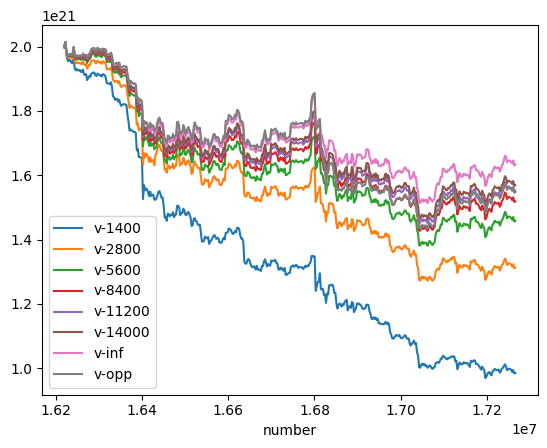

In [33]:
# values in units of token1 over time
ax = df.plot(x='number', y=[f'v-{tick_width}' if tick_width > 0 else ('v-inf' if tick_width == 0 else 'v-opp') for tick_width in tick_widths])
ax.get_figure().savefig('results/backtest/UniswapV3LPSimpleRunner_0x88e6A0c2dDD26FEEb64F039a2c41296FcB3f5640_values_7200_16219692_17267692_2400.png')

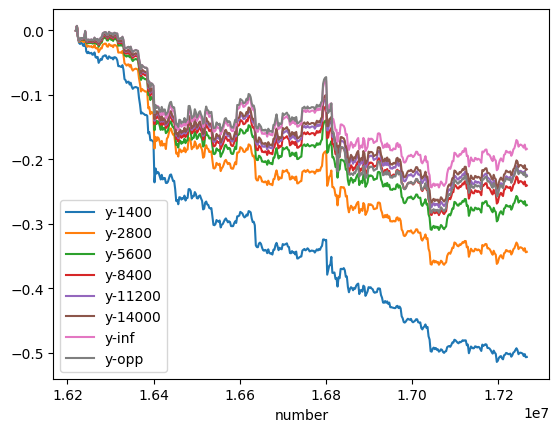

In [34]:
# yields in units of token1 over time
ax = df.plot(x='number', y=[f'y-{tick_width}' if tick_width > 0 else ('y-inf' if tick_width == 0 else 'y-opp')  for tick_width in tick_widths])
ax.get_figure().savefig('results/backtest/UniswapV3LPSimpleRunner_0x88e6A0c2dDD26FEEb64F039a2c41296FcB3f5640_yields_7200_16219692_17267692_2400.png')

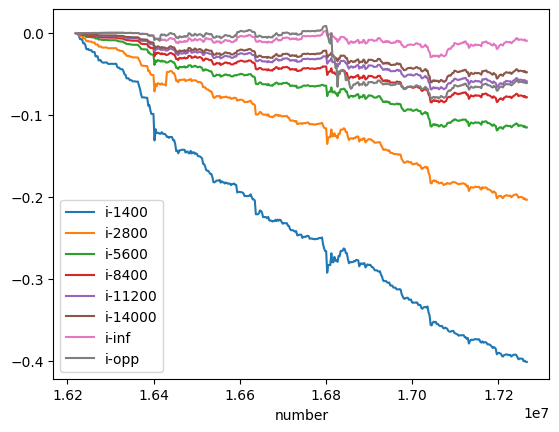

In [35]:
# yields in units of token1 over time relative to passive hold
ax = df.plot(x='number', y=[f'i-{tick_width}' if tick_width > 0 else ('i-inf' if tick_width == 0 else 'i-opp')  for tick_width in tick_widths])
ax.get_figure().savefig('results/backtest/UniswapV3LPSimpleRunner_0x88e6A0c2dDD26FEEb64F039a2c41296FcB3f5640_yields_v_hold_7200_16219692_17267692_2400.png')

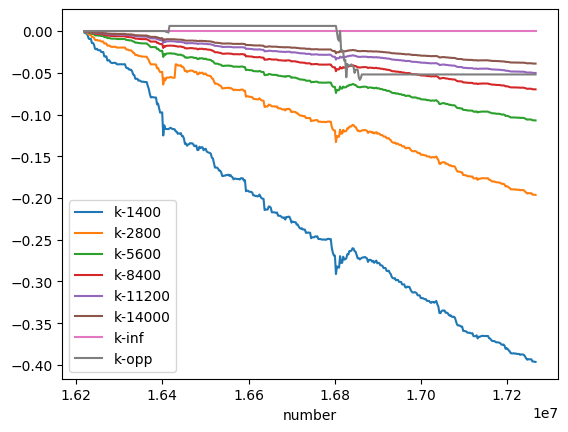

In [36]:
# yields in units of token1 over time relative to full tick range LP
ax = df.plot(x='number', y=[f'k-{tick_width}' if tick_width > 0 else ('k-inf' if tick_width == 0 else 'k-opp') for tick_width in tick_widths])
ax.get_figure().savefig('results/backtest/UniswapV3LPSimpleRunner_0x88e6A0c2dDD26FEEb64F039a2c41296FcB3f5640_yields_v_full_range_7200_16219692_17267692_2400.png')

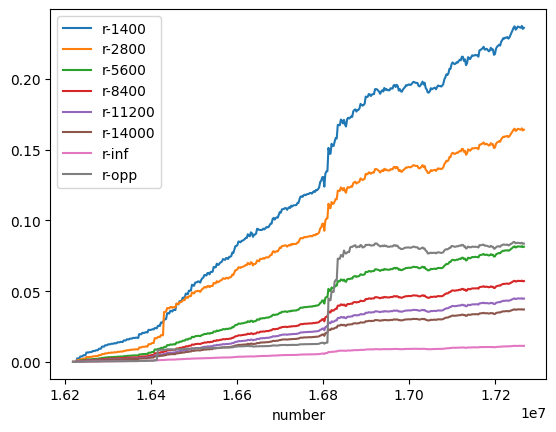

In [37]:
# fee returns in units of token1 over time
ax = df.plot(x='number', y=[f'r-{tick_width}' if tick_width > 0 else ('r-inf' if tick_width == 0 else 'r-opp')  for tick_width in tick_widths])
ax.get_figure().savefig('results/backtest/UniswapV3LPSimpleRunner_0x88e6A0c2dDD26FEEb64F039a2c41296FcB3f5640_fee_returns_7200_16219692_17267692_2400.png')

<Axes: xlabel='number'>

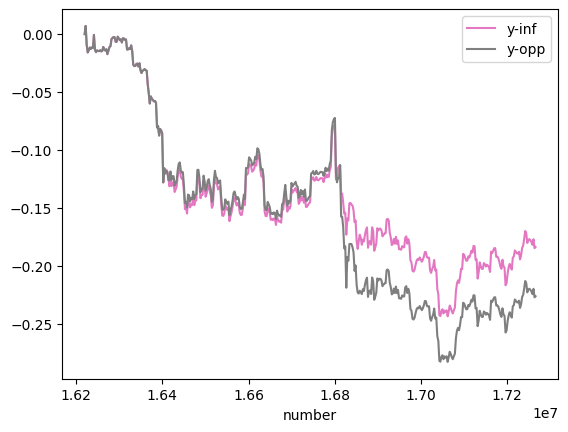

In [38]:
# focus on only opportunistic vs passive v2
df.plot(x='number', y=['y-inf', 'y-opp'], color=['C6', 'C7'])

<Axes: xlabel='number'>

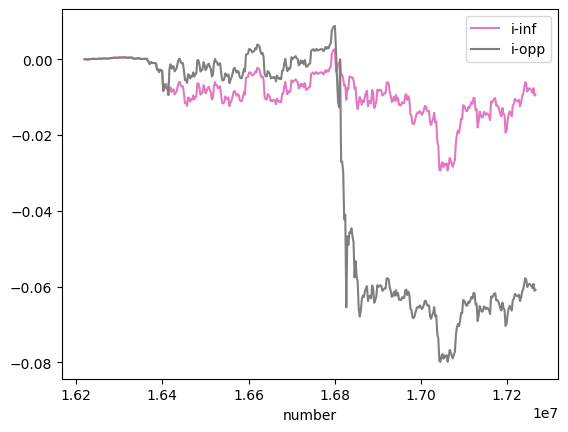

In [39]:
df.plot(x='number', y=['i-inf', 'i-opp'], color=['C6', 'C7'])

<Axes: xlabel='number'>

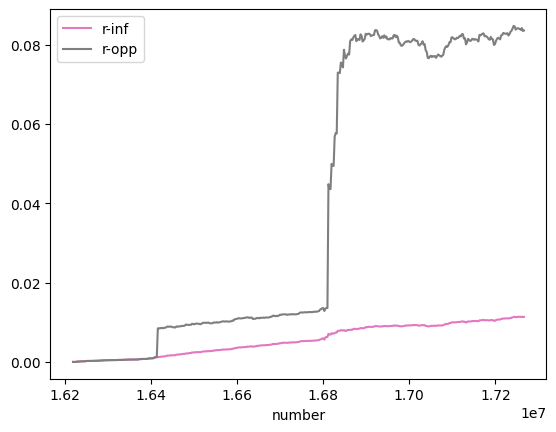

In [40]:
df.plot(x='number', y=['r-inf', 'r-opp'], color=['C6', 'C7'])

In [41]:
df['d(k-opp)'] = df['k-opp'].diff()

<Axes: xlabel='number'>

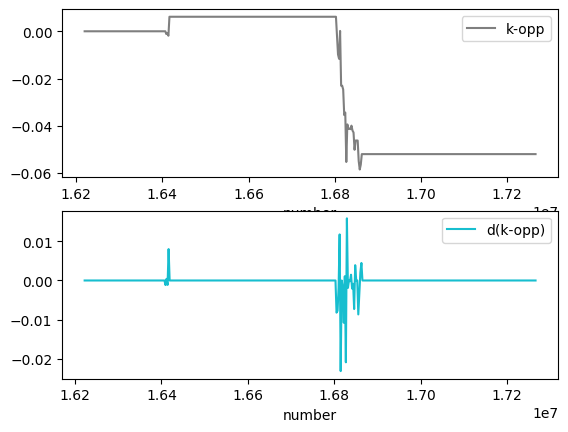

In [42]:
fig, ax = plt.subplots(2, 1)
df.plot(x='number', y='k-opp', color='C7', ax=ax[0])
df.plot(x='number', y='d(k-opp)', color='C9', ax=ax[1])

In [43]:
# plot tick change over time to graph side by side with opportunistic yield. magnitude of jumps as well where IL hits hardest
# further, mark places on yield plots where opportunistic LP chooses tick width < full range (~theta > theta_min)

In [44]:
# go back and look at log prices
df['dprice'] = df['price'] / df['price'].iloc[0] - 1
df['dprice']

0      0.000000
1      0.014201
2     -0.019046
3     -0.031406
4     -0.027622
         ...   
432   -0.344893
433   -0.348900
434   -0.341248
435   -0.353528
436   -0.351993
Name: dprice, Length: 437, dtype: float64

<Axes: xlabel='number'>

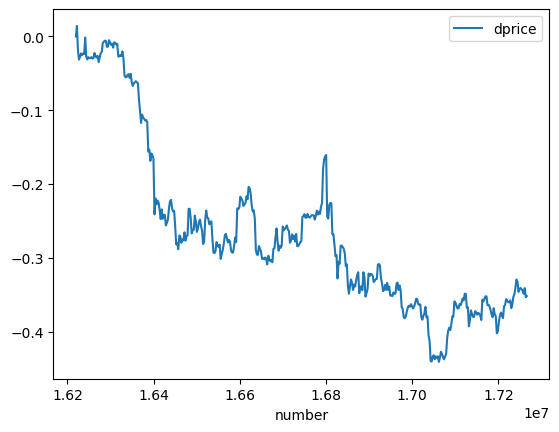

In [45]:
df.plot(x='number', y='dprice')

In [46]:
df['dlog(price)'] = df['tick'].diff() * np.log(1.0001)
df['dlog(price)']

0           NaN
1      0.014099
2     -0.033298
3     -0.012699
4      0.003900
         ...   
432   -0.003300
433   -0.006100
434    0.011699
435   -0.018899
436    0.002400
Name: dlog(price), Length: 437, dtype: float64

<Axes: xlabel='number'>

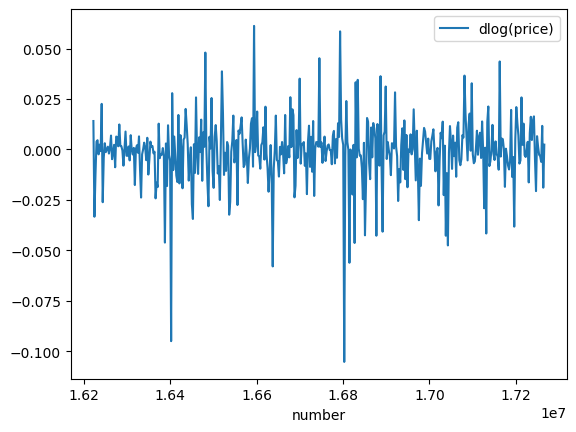

In [47]:
df.plot(x='number', y='dlog(price)')

In [48]:
# calculate per candle sigma to see magnitude of largest tick move
blocks_per_candle = df['number'].diff().iloc[-1]
blocks_per_candle

2400.0

In [49]:
sigma_per_candle = sigma * (blocks_per_candle) ** (1/2)
sigma_per_candle

0.022272920633554683

In [50]:
# max tick change per candle on chart
np.abs(df['dlog(price)']).max()

0.10519474035062878

In [51]:
# 4.7 sigma move
np.abs(df['dlog(price)']).max() / sigma_per_candle

4.722988155947111

In [52]:
# probability of this occuring in log-normal world is roughly (ignoring drift) ...
#  ... log(p_{t+dt}/p_t) = sigma_per_candle * W_1
#  ...  => P[log(p_{t+dt}/p_t) > z_{alpha}] = 1 - Phi(z_{\alpha}/sigma_per_candle)
1 - norm.cdf(np.abs(df['dlog(price)']).max() / sigma_per_candle)

1.1620219461105918e-06

In [53]:
# ~1 in 1 million chance for 2400 blocks per candle
# implies only happens in log normal world every 2065365467 blocks (~ 2 billion blocks)
int(blocks_per_candle / (1 - norm.cdf(np.abs(df['dlog(price)']).max() / sigma_per_candle)))

2065365467

In [54]:
# or in years ... once every 785 years in log-normal world
SECONDS_PER_BLOCK = 12
(int(blocks_per_candle / (1 - norm.cdf(np.abs(df['dlog(price)']).max() / sigma_per_candle))) * SECONDS_PER_BLOCK) // (365.25 * 86400)

785.0

In [55]:
# suggests LP losing money on this large jump due our model's naive reliance on GBM
# and GBM's inability to capture tail behavior (i.e. discontinuous jumps in stochastic process)
# as had two of these moves within backtest span of ~ 5 months

In [56]:
np.abs(df['dlog(price)']).sort_values(ascending=False)

243    0.105195
76     0.094895
156    0.061197
239    0.058497
174    0.057897
         ...   
49     0.000100
249    0.000000
14     0.000000
305    0.000000
0           NaN
Name: dlog(price), Length: 437, dtype: float64

In [57]:
# order of mag less but still on order of once every ~ 100 years for single candle
1 - norm.cdf(np.abs(df['dlog(price)']).sort_values(ascending=False).iloc[1] / sigma_per_candle)

1.0195478508778777e-05

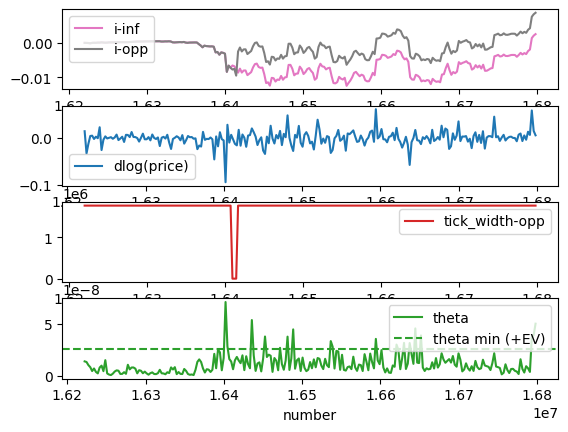

In [58]:
# plot comparison of backtests relative to passive hold before the largest move to see outperformance of opportunistic strategy
#  ... looks like just got lucky on jump candle at block 1.64e7
#  ... seems because tick width adjustment happened *after* price move due to time delay in rebalances
fig, ax = plt.subplots(4, 1)
df[df['number'] < 1.68e7].plot(x='number', y=['i-inf', 'i-opp'], color=['C6', 'C7'], ax=ax[0])
ax[0].legend(loc='upper left')

df[df['number'] < 1.68e7].plot(x='number', y='dlog(price)', color='C0', ax=ax[1])
df[df['number'] < 1.68e7].plot(x='number', y='tick_width-opp', color='C3', ax=ax[2])

df[df['number'] < 1.68e7].plot(x='number', y='theta', color='C2', ax=ax[3])
ax[3].axhline(theta_min, color='C2', linestyle='--', label='theta min (+EV)')
ax[3].legend(loc='upper right')

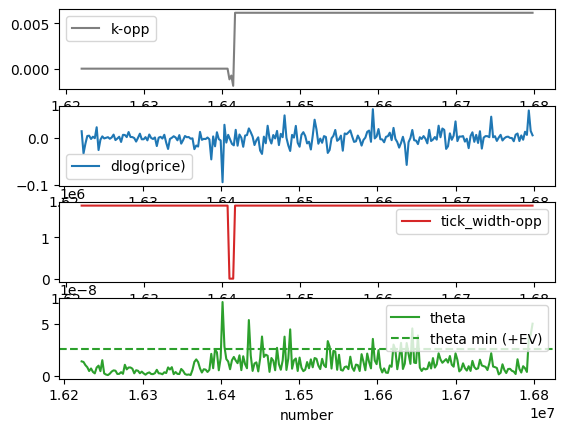

In [59]:
# plot comparison of backtests relative to full range before the largest move to see outperformance of opportunistic strategy
fig, ax = plt.subplots(4, 1)
df[df['number'] < 1.68e7].plot(x='number', y=['k-opp'], color=['C7'], ax=ax[0])
ax[0].legend(loc='upper left')

df[df['number'] < 1.68e7].plot(x='number', y='dlog(price)', color='C0', ax=ax[1])
df[df['number'] < 1.68e7].plot(x='number', y='tick_width-opp', color='C3', ax=ax[2])

df[df['number'] < 1.68e7].plot(x='number', y='theta', color='C2', ax=ax[3])
ax[3].axhline(theta_min, color='C2', linestyle='--', label='theta min (+EV)')
ax[3].legend(loc='upper right')

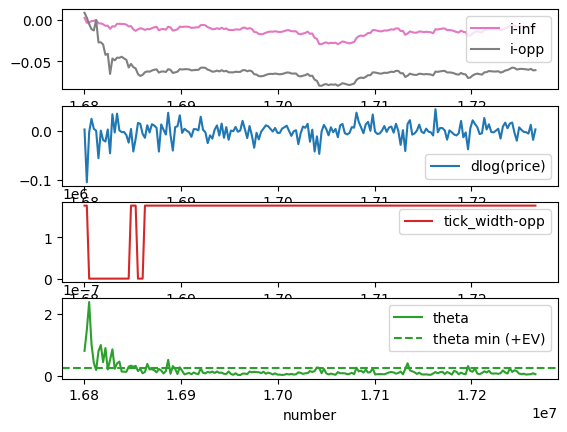

In [60]:
# plot comparison of backtests relative to passive hold after the largest move to see underperformance of opportunistic strategy
fig, ax = plt.subplots(4, 1)
df[df['number'] > 1.68e7].plot(x='number', y=['i-inf', 'i-opp'], color=['C6', 'C7'], ax=ax[0])
ax[0].legend(loc='upper right')

df[df['number'] > 1.68e7].plot(x='number', y='dlog(price)', color='C0', ax=ax[1])
df[df['number'] > 1.68e7].plot(x='number', y='tick_width-opp', color='C3', ax=ax[2])

df[df['number'] > 1.68e7].plot(x='number', y='theta', color='C2', ax=ax[3])
ax[3].axhline(theta_min, color='C2', linestyle='--', label='theta min (+EV)')
ax[3].legend(loc='upper right')

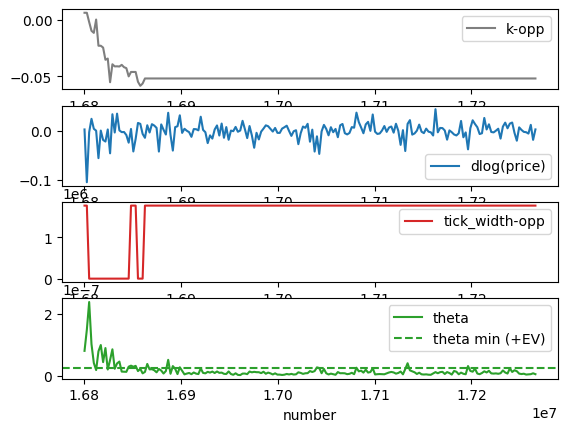

In [61]:
# plot comparison of backtests relative to full range after the largest move to see underperformance of opportunistic strategy
fig, ax = plt.subplots(4, 1)
df[df['number'] > 1.68e7].plot(x='number', y=['k-opp'], color=['C7'], ax=ax[0])
ax[0].legend(loc='upper right')

df[df['number'] > 1.68e7].plot(x='number', y='dlog(price)', color='C0', ax=ax[1])
df[df['number'] > 1.68e7].plot(x='number', y='tick_width-opp', color='C3', ax=ax[2])

df[df['number'] > 1.68e7].plot(x='number', y='theta', color='C2', ax=ax[3])
ax[3].axhline(theta_min, color='C2', linestyle='--', label='theta min (+EV)')
ax[3].legend(loc='upper right')

In [62]:
df['P[dlog(price) > z]'] = 1 - norm.cdf(np.abs(df['dlog(price)']) / sigma_per_candle)
df['P[dlog(price) > z]']

0           NaN
1      0.263359
2      0.067455
3      0.284281
4      0.430504
         ...   
432    0.441110
433    0.392096
434    0.299696
435    0.198074
436    0.457097
Name: P[dlog(price) > z], Length: 437, dtype: float64

In [63]:
# Does tick width adjust happen after large log price change? It does.
# However, there are several other 2+ sigma events (P ~ 1% chance) within the 7 day period after largest move.
df[(df['number'] > 1.68e7) & (df['number'] < 1.685e7)].filter(items=['number', 'dlog(price)', 'P[dlog(price) > z]', 'tick_width-opp', 'd(k-opp)'])

,number,dlog(price),P[dlog(price) > z],tick_width-opp,d(k-opp)
242,16800493,0.002300,0.458879,1774540,-3.372858e-13
243,16802893,-0.105195,0.000001,1774540,1.265654e-13
244,16805293,-0.003300,0.441110,180,-8.232793e-03
245,16807693,0.023999,0.140631,180,-7.736710e-03
246,16810093,0.003700,0.434034,180,-1.822083e-03
247,16812493,-0.000200,0.496418,360,1.178563e-02
248,16814893,-0.056097,0.005891,360,-2.318211e-02
249,16817293,0.000000,0.500000,360,-9.294782e-07
250,16819693,-0.019099,0.195584,400,-1.629596e-03
251,16822093,-0.022299,0.158373,400,-1.081410e-02


In [64]:
#  ... the most significant negative changes to opportunistic yield relative to full range LPing happen after each of these extreme events
#  ... gives credibility to argument that LP opportunitistic strategy is underperforming due to mismodelled price behavior (i.e. no tails modelled)
df[(df['number'] > 1.68e7) & (df['number'] < 1.685e7)].filter(items=['number', 'dlog(price)', 'P[dlog(price) > z]', 'tick_width-opp', 'd(k-opp)']).sort_values(by='d(k-opp)')

,number,dlog(price),P[dlog(price) > z],tick_width-opp,d(k-opp)
248,16814893,-0.056097,0.005891,360,-2.318211e-02
253,16826893,-0.046298,0.018825,160,-2.093343e-02
251,16822093,-0.022299,0.158373,400,-1.081410e-02
244,16805293,-0.003300,0.441110,180,-8.232793e-03
245,16807693,0.023999,0.140631,180,-7.736710e-03
261,16846093,-0.024599,0.134704,780,-7.304303e-03
259,16841293,-0.002900,0.448206,780,-2.068584e-03
255,16831693,-0.003900,0.430504,160,-1.887676e-03
246,16810093,0.003700,0.434034,180,-1.822083e-03
250,16819693,-0.019099,0.195584,400,-1.629596e-03


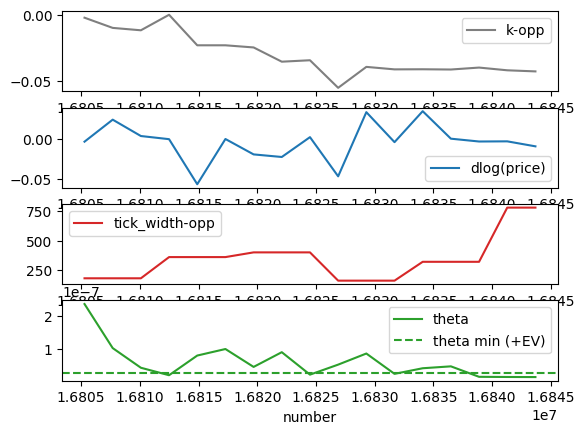

In [65]:
# plot comparison of backtests relative to full range after the largest move to see underperformance of opportunistic strategy
# constrained to 1 week period after price event
#  ... inherent time lag in theta assessment used to determine opp optimal tick delta def an issu
fig, ax = plt.subplots(4, 1)
df[(df['number'] > 16802893) & (df['number'] < 16846093)].plot(x='number', y=['k-opp'], color=['C7'], ax=ax[0])
ax[0].legend(loc='upper right')

df[(df['number'] > 16802893) & (df['number'] < 16846093)].plot(x='number', y='dlog(price)', color='C0', ax=ax[1])
df[(df['number'] > 16802893) & (df['number'] < 16846093)].plot(x='number', y='tick_width-opp', color='C3', ax=ax[2])

df[(df['number'] > 16802893) & (df['number'] < 16846093)].plot(x='number', y='theta', color='C2', ax=ax[3])
ax[3].axhline(theta_min, color='C2', linestyle='--', label='theta min (+EV)')
ax[3].legend(loc='upper right')

fig.savefig('results/backtest/UniswapV3LPSimpleRunner_0x88e6A0c2dDD26FEEb64F039a2c41296FcB3f5640_yields_v_full_range_after_jump_7200_16219692_17267692_2400.png')

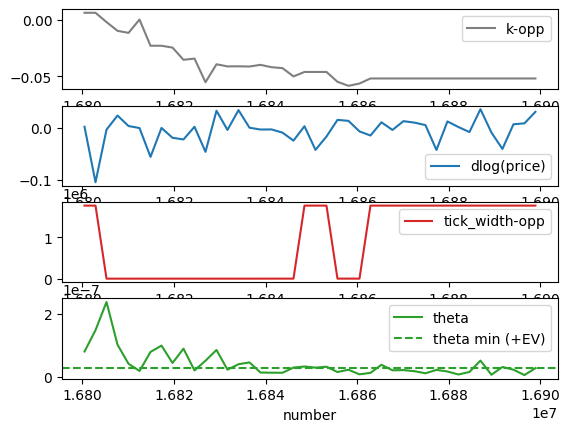

In [66]:
# look at other opportunistic liquidity provision after this initial jump to see how strat did
fig, ax = plt.subplots(4, 1)
df[(df['number'] > 1.68e7) & (df['number'] < 1.69e7)].plot(x='number', y=['k-opp'], color=['C7'], ax=ax[0])
ax[0].legend(loc='upper right')

df[(df['number'] > 1.68e7) & (df['number'] < 1.69e7)].plot(x='number', y='dlog(price)', color='C0', ax=ax[1])
df[(df['number'] > 1.68e7) & (df['number'] < 1.69e7)].plot(x='number', y='tick_width-opp', color='C3', ax=ax[2])

df[(df['number'] > 1.68e7) & (df['number'] < 1.69e7)].plot(x='number', y='theta', color='C2', ax=ax[3])
ax[3].axhline(theta_min, color='C2', linestyle='--', label='theta min (+EV)')
ax[3].legend(loc='upper right')

In [67]:
df[(df['number'] > 1.685e7) & (df['number'] < 1.687e7)].filter(items=['number', 'dlog(price)', 'P[dlog(price) > z]', 'tick_width-opp', 'd(k-opp)'])

,number,dlog(price),P[dlog(price) > z],tick_width-opp,d(k-opp)
263,16850893,-0.042498,0.028192,1774540,-2.442491e-13
264,16853293,-0.016699,0.226702,1774540,3.058664e-13
265,16855693,0.015599,0.241849,820,-8.682588e-03
266,16858093,0.013699,0.269256,820,-3.582119e-03
267,16860493,-0.006700,0.381784,820,2.026265e-03
268,16862893,-0.014699,0.254639,1774540,4.480468e-03
269,16865293,0.010899,0.312294,1774540,-5.628831e-14
270,16867693,-0.003900,0.430504,1774540,1.948441e-13


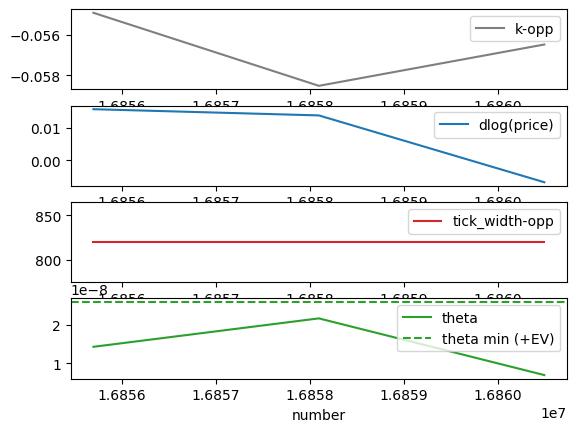

In [68]:
# look at other opportunistic liquidity provision after this initial jump to see how strat did
#  ... pretty even
fig, ax = plt.subplots(4, 1)
df[(df['number'] > 16853293) & (df['number'] < 16862893)].plot(x='number', y=['k-opp'], color=['C7'], ax=ax[0])
ax[0].legend(loc='upper right')

df[(df['number'] > 16853293) & (df['number'] < 16862893)].plot(x='number', y='dlog(price)', color='C0', ax=ax[1])
df[(df['number'] > 16853293) & (df['number'] < 16862893)].plot(x='number', y='tick_width-opp', color='C3', ax=ax[2])

df[(df['number'] > 16853293) & (df['number'] < 16862893)].plot(x='number', y='theta', color='C2', ax=ax[3])
ax[3].axhline(theta_min, color='C2', linestyle='--', label='theta min (+EV)')
ax[3].legend(loc='upper right')

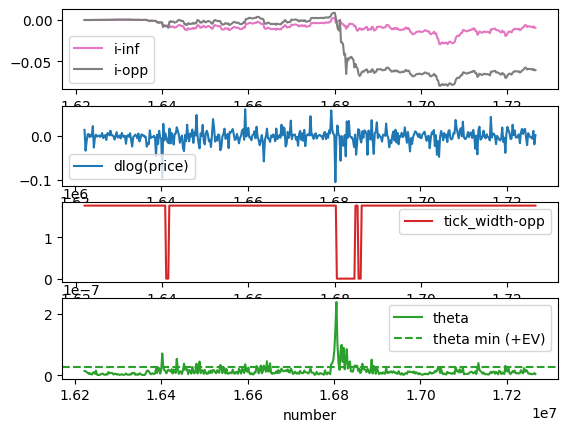

In [69]:
# side by side over full timespan for yield vs passive hold ...
fig, ax = plt.subplots(4, 1)

df.plot(x='number', y=['i-inf', 'i-opp'], color=['C6', 'C7'], ax=ax[0])
ax[0].legend(loc='lower left')

df.plot(x='number', y='dlog(price)', color='C0', ax=ax[1])
df.plot(x='number', y='tick_width-opp', color='C3', ax=ax[2])

df.plot(x='number', y='theta', color='C2', ax=ax[3])
ax[3].axhline(theta_min, color='C2', linestyle='--', label='theta min (+EV)')
ax[3].legend(loc='upper right')

fig.savefig('results/backtest/UniswapV3LPSimpleRunner_0x88e6A0c2dDD26FEEb64F039a2c41296FcB3f5640_yields_v_hold_over_full_timespan_7200_16219692_17267692_2400.png')

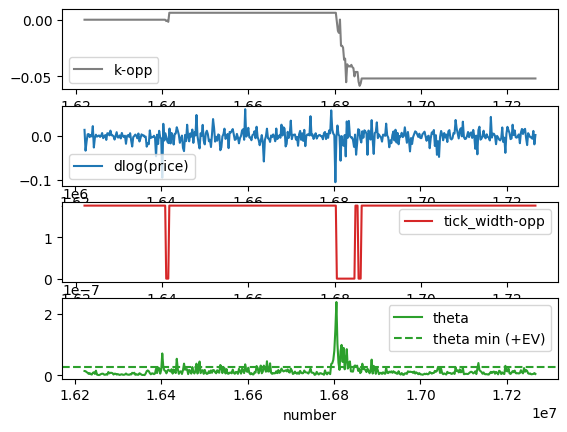

In [70]:
# side by side over full timespan for opp yield vs full range LP ...
fig, ax = plt.subplots(4, 1)

df.plot(x='number', y=['k-opp'], color=['C7'], ax=ax[0])
ax[0].legend(loc='lower left')

df.plot(x='number', y='dlog(price)', color='C0', ax=ax[1])
df.plot(x='number', y='tick_width-opp', color='C3', ax=ax[2])

df.plot(x='number', y='theta', color='C2', ax=ax[3])
ax[3].axhline(theta_min, color='C2', linestyle='--', label='theta min (+EV)')
ax[3].legend(loc='upper right')

fig.savefig('results/backtest/UniswapV3LPSimpleRunner_0x88e6A0c2dDD26FEEb64F039a2c41296FcB3f5640_yield_v_full_range_over_full_timespan_7200_16219692_17267692_2400.png')